# Datos Ausentes

## Tratamiento de Datos Faltantes

Ya hemos aprendido a cómo identificar y visualizar la presencia de datos ausente en un dataset. Sin embargo, ahora deben¡mos tomar una decisión acerca de su tratamiento. Las alternativas ante esto son las siguientes:

- No hacer nada: Este es el método más simple y rápido. Esta decisión conlleva a dejar a criterio de las funciones la imputación de los mismos. Sin embargo, no todos los métodos y funciones trabajan con datos perdidos, por lo tanto es necesario tratarlos.

- Eliminar Datos Faltantes: Para la eliminación de datos faltantes existen dos tipos: 

    - Eliminanción por pareja: Los valores faltantes se omiten durante los cálculos, tal como es el caso de cálculo de la media.

    - Eliminación por lista: Se elimina la fila completa. Esta eliminación se utiliza cuando tenemos datos completamente perdidos al azar, es decir, cuando no es posible la imputación de la data.

    Es importante señalar que este método se ocupa cuando no podemos realizar imputación de valores perdidos o bien cuando son pocos los datos ausentes dentro de la data. 

A continuación, abordarenos las técnicas de tratamiento de datos perdidos señalas.

### Eliminación de datos

#### Eliminación por parejas:

A continuación importaremos nuevamente nuestro dataset de diabetes.

In [97]:
# Importar pandas
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [98]:
# Archivo csv
file = "datos/diabetes.csv"

# Leer csv
diabetes = pd.read_csv(file, sep=",")

# Visualizar primeros registros
diabetes.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [99]:
# Selección de columnas a modificar
columnas_cambiar = list(diabetes.columns[1:6])

# Bucle for
for columna_cambiar in columnas_cambiar:
    # seleccionar df.loc[filas == 0 , columna]
    diabetes.loc[diabetes[columna_cambiar] == 0 , columna_cambiar] = np.nan

A las columnas con datos faltantes aplicaremos la eliminación por pareja, es decir, procederemos a omitir dichos datos en los cálculos de nuestros estadísgrafos.

In [100]:
# Cálculo de media de variable glucosa por medio de eliminación por parejas
media = diabetes['Glucose'].mean()
print(f'Media Glucose = {media}')

Media Glucose = 121.6867627785059


Ahora comprobaremos que el cálculo de la media se haya realizado de forma correcta, es decir, omitiendo las filas nulas en el cálculo.

In [101]:
# Cálculo número de filas Dataframe
filas = len(diabetes)
print(f'- Número de filas DataFrame = {filas} \n')

# Cálculo número de filas no nulas varaibles glucosa
filas_no_nulas_glucosa = diabetes['Glucose'].count()
print(f'- Número de filas no nulas variable Glucose = {filas_no_nulas_glucosa}')

# Suma total variable Glucose
total_glucosa = diabetes['Glucose'].sum()
print(f'- Suma total variable Glucose = {total_glucosa}' )

- Número de filas DataFrame = 768 

- Número de filas no nulas variable Glucose = 763
- Suma total variable Glucose = 92847.0


In [102]:
# Cálculo de media de variable glucosa de forma manual
print(f'Media Glucose cálculo manual = {total_glucosa/filas_no_nulas_glucosa}')

Media Glucose cálculo manual = 121.6867627785059


Hemos comprobado que la función `mean()` realiza la eliminación parejas. Sin embargo, no todos los algoritmos de machine learning cuentan con este tipo de eliminación, por lo tanto debemos buscar la forma de tratar estos datos.

#### Eliminación por lista:

Con este método se procede a eliminar observar que variable presenta valores perdidos completamente al azar. Usaremos la biblioteca missingno.

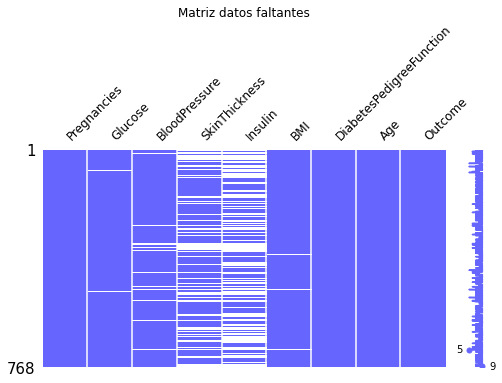

In [103]:
# Graficar DataFrame
msno.matrix(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,4))
plt.title('Matriz datos faltantes')
plt.show()

Podemos observar que la variable *Glucose* presenta un bajo número de datos perdidos, los cuales aparentemente son completamente al azar. Estos datos faltantes cumplen con ser datos perdidos completamente al azar ya que no cumplen con un patrón de ausencia de datos, junto con presentar un bajo número de valores faltantes.

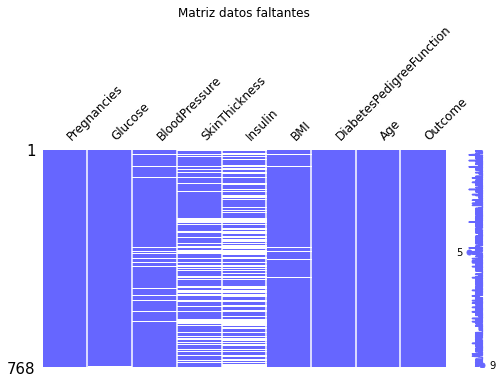

In [104]:
# Graficar DataFrame
diabetes_sort = diabetes.sort_values('Glucose')
msno.matrix(diabetes_sort, color=(0.4,0.4,1),fontsize= 12,figsize= (8,4))
plt.title('Matriz datos faltantes')
plt.show()

In [105]:
# Visualizar valores perdidos en cantidad y porcentaje
total_na = diabetes['Glucose'].isnull().sum()
print(f'- Cantidad datos faltantes de la variable Glucose ascienden a {total_na}')
mean_glucose =round(diabetes['Glucose'].isnull().mean() *100, 2)
print(f'- Los datos faltantes de la variable Glucose corresponden al {mean_glucose}% del total de la data')

- Cantidad datos faltantes de la variable Glucose ascienden a 5
- Los datos faltantes de la variable Glucose corresponden al 0.65% del total de la data


Al cumplirse los dos criterios, se procede a eliminar la lista de datos faltante para la variable _Glucose_

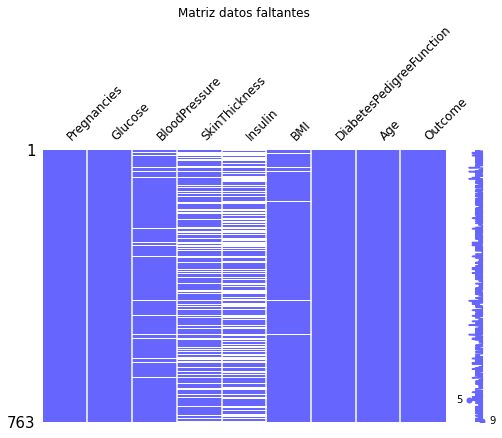

In [106]:
# Eliminar la fila de valores donde la variable Glucose presente valores nulos.
diabetes.dropna(subset=['Glucose'], how='any', inplace=True)

# Graficar DataFrame luego de la eliminación de datos faltantes.
msno.matrix(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.title('Matriz datos faltantes')
plt.show()

Se observa, al igual que la variable _Glucose_, la variable _BMI_ presenta datos perdidos completamente al azar, por tanto cumple una de nuestras condiciones. La segunda condición es que presente un bajo número de valores faltantes.

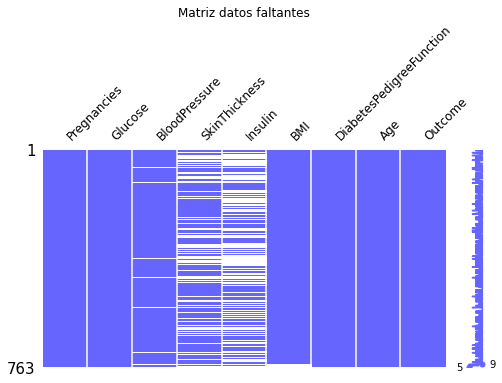

In [107]:
# Graficar DataFrame
diabetes_sort = diabetes.sort_values('BMI')
msno.matrix(diabetes_sort, color=(0.4,0.4,1),fontsize= 12,figsize= (8,4))
plt.title('Matriz datos faltantes')
plt.show()

In [108]:
# Visualizar valores perdidos en cantidad y porcentaje
total_na = diabetes['BMI'].isnull().sum()
print(f'- Cantidad datos faltantes de la variable BMI ascienden a {total_na}')
mean_glucose =round(diabetes['BMI'].isnull().mean() *100, 2)
print(f'- Los datos faltantes de la variable BMI corresponden al {mean_glucose}% del total de la data')

- Cantidad datos faltantes de la variable BMI ascienden a 11
- Los datos faltantes de la variable BMI corresponden al 1.44% del total de la data


In [109]:
# Visualizar valores perdidos en cantidad y porcentaje
print('Cantidad datos faltantes = ' + str(diabetes['BMI'].isnull().sum()))
print('Los datos faltantes corresponden al ' + str(round(diabetes['BMI'].isnull().mean() *100, 2))+ '% del total de la data')

Cantidad datos faltantes = 11
Los datos faltantes corresponden al 1.44% del total de la data


Al cumplirse los dos criterios, se procede a eliminar la lista de datos faltante para la variable _BMI_

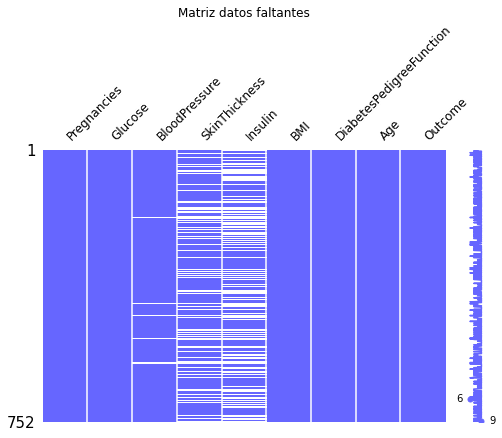

In [110]:
# Eliminar la fila de valores donde la variable BMI presente valores nulos.
diabetes.dropna(subset=['BMI'], how='any', inplace=True)

# Graficar DataFrame luego de la eliminación de datos faltantes.
msno.matrix(diabetes, color=(0.4,0.4,1),fontsize= 12,figsize= (8,5))
plt.title('Matriz datos faltantes')
plt.show()

### Imputación de valores

Existen distintas técnicas para el tratamiento de datos ausentes. Dentro de las técnicas básicas de imputación de datos destacan:

- Contante (por ejemplo, imputar 0)
- Media
- Mediana
- Moda

Estas técnicas de imputación de datos las podemos encontrar en la función `SimpleImputer()` de la biblioteca sklearn.


#### SimpleImputer

La función `SimpleImputer( )` cuenta con las siguientes estrategias (strategy) de imputación a los valores faltantes:

- "mean": El valor faltante se reemplaza por la media. Sólo puede ser usada para datos numéricos.

- "median": El valor faltante se reemplaza por la mediana. Sólo puede ser usada para datos numéricos.

- "most_frequent": El valor faltante se reemplaza por la moda. Puede ser usada tanto para datos de textos y numéricos.

- "constant": El valor faltante se reemplaza por cero. Puede ser usada tanto para datos de textos y numéricos. El valor por defecto es 0. También, la constante puede ser modificada. Por ejemlo, si se desea reemplazar por el valor 5 se debe indicar de la siguiente forma: `SimpleImputer(strategy='constant', fill_value= 5)`.

A continuación imputaremos los datos ausentes usando esta función.

- **Imputación por media**

In [111]:
# Importar módulo de imputación
from sklearn.impute import SimpleImputer 

# Generar copia de DataFrame con el nombre de media
diabetes_media = diabetes.copy(deep=True)

# Crear objeto imputador de media
imputar_media = SimpleImputer(strategy='mean')

# Imputar datos faltantes con la media en el dataframe 
diabetes_media.iloc[:, :] = imputar_media.fit_transform(diabetes_media)

# Visualizar si existen datos nulos
diabetes_media.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

A continuación, procederemos a generar distintas estrategias de imputación de datos.

In [112]:
# Estrategias
estrategias = {'diabetes_media': 'mean',
              'diabetes_mediana': 'median',
              'diabetes_moda': 'most_frequent',
              'diabetes_constante': 'constant'
              }

for key, value in estrategias.items():
    
    # imprimir método imputación
    print('_'*15 + key + '_'*15)
    
    # generar nuevo DataFrame por estrategia
    key = diabetes.copy(deep=True)
    
    # Crear objeto imputador de media e imputar
    imputar = SimpleImputer(strategy = value)
    
    key.iloc[:, :] = imputar.fit_transform(key)


    # Visualizar si existen datos nulos
    print(key.isna().sum())
    print(key.head(3))
    print() #imprimir salto de línea
    print() #imprimir salto de línea

_______________diabetes_media_______________
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
0          6.0    148.0           72.0      35.000000  156.056122  33.6   
1          1.0     85.0           66.0      29.000000  156.056122  26.6   
2          8.0    183.0           64.0      29.172285  156.056122  23.3   

   DiabetesPedigreeFunction   Age  Outcome  
0                     0.627  50.0      1.0  
1                     0.351  31.0      0.0  
2                     0.672  32.0      1.0  


_______________diabetes_mediana_______________
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin               

Observemos ausencia de valor en la fila 3 para la variable _SkinThickness_ antes del proceso de imputación. Ahora los valores que toma, según el criterio de imputación son los siguientes: 
- media = 29.172285
- mediana = 29
- moda = 32

A continuación verificaremos que los valores imputados sean los correctos. Para esto, usaremos las funciones de media, mediana y moda y compararemos con el valor imputado.

In [113]:
media = round(diabetes['SkinThickness'].mean(),6)
mediana = round(diabetes['SkinThickness'].median(),6)
moda = round(diabetes['SkinThickness'].mode(),6)[0]

print(f'La media para la variable SkinThickness es de {media}')
print(f'La mediana para la variable SkinThickness es de {mediana}')
print(f'La moda para la variable SkinThickness es de {moda}')

La media para la variable SkinThickness es de 29.172285
La mediana para la variable SkinThickness es de 29.0
La moda para la variable SkinThickness es de 32.0


Observamos que el valor calculado por medio de la función es el mismo al imputado por cada una de las técnicas.

#### Imputación de datos faltantes para series temporales

Cuando tenemos presencia de valores faltantes en dataset de series temporales, la técnica de imputación cambia, dado que los datos son medidos a través del tiempo, en determinados momentos (años, semestres, trimestres, meses, semanas, días, horas) y ordenados cronológicamente. Dada su naturaleza, estos datos presentan tendencias, ciclos, estacionalidad y aleatoriedad. 

A continuación, revisaremos algunos métodos utilizados para la imputación de datos faltantes en series temporales, usando un dataset de calidad del aire.


In [127]:
import pandas as pd
# Fijar la ruta donde se encuentra el archivo
ruta = "datos/"
csv_file = "air-quality.csv"

# Leer csv indicando el nombre de archivo
df = pd.read_csv(ruta + csv_file, parse_dates=['Date'], index_col='Date')

# visualizar primeros registros
df.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,NaN,NaN,14.3,56
1976-05-06,28.0,NaN,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


Las variables que contiene este dataset son:

- Ozone: Ozono medio en partículas por billón

- Solar.R: Radiación solar.

- Wind: Velocidad promedio del viento en millas por horas.

- Temp: Temperatura máxima diaria en grados Fahrenheit.

A simple vista, notamos presencia de valores faltantes. Procederemos a identificar los valores ausentes.

In [118]:
# Información de la data
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 1976-05-01 to 1976-09-30
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Ozone   116 non-null    float64
 1   Solar   146 non-null    float64
 2   Wind    153 non-null    float64
 3   Temp    153 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 6.0 KB


Se observa que el esquema de la data ha sido inferido de manera correcta. Además, existen valores nulos en las columnas **Ozono** y **Solar**

In [120]:
# Descripción de la data
df.describe()

,Ozone,Solar,Wind,Temp
count,116.000000,146.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353
std,32.987885,90.058422,3.523001,9.465270
min,1.000000,7.000000,1.700000,56.000000
25%,18.000000,115.750000,7.400000,72.000000
50%,31.500000,205.000000,9.700000,79.000000
75%,63.250000,258.750000,11.500000,85.000000
max,168.000000,334.000000,20.700000,97.000000


Los valores mínimos y máximo de la data son concordante con los valores que pueden tomar cada una de las variables del dataset.

In [121]:
# Contar datos nulos
print("Cantidad de datos nulos")
print(df.isna().sum())
print()

# Porcentaje datos nulos
print("Porcentaje de datos nulos")
print(df.isna().mean()*100)

Cantidad de datos nulos
Ozone    37
Solar     7
Wind      0
Temp      0
dtype: int64

Porcentaje de datos nulos
Ozone    24.183007
Solar     4.575163
Wind      0.000000
Temp      0.000000
dtype: float64


Se observa que la variable **Ozone** tiene un alto porcentaje de valores nulos. En tanto, la cantidad de variable nulos **Solar** es baja. 

Además, de aplicar estas funciones, realizaremos un bucle para detectar los valores únicos por variable a fin de observar si hay valores nulos no detectados.

*Nota: es dificil que existan, dado que cuando se ingresa información no nula de forma manual e importanmos nuestro dataset, la función de lectura no puede inferir de manera correcta el esquema de los datos.*

In [125]:
# Iterar valores por columnas
for columna in df.columns:
    # Ordenar valores y seleccionar valores únicos
    i = df[columna].sort_values().unique()
    # Imprimir nombre de columnas y lista de sus valores únicos
    print(columna, i, '\n')


Ozone [  1.   4.   6.   7.   8.   9.  10.  11.  12.  13.  14.  16.  18.  19.
  20.  21.  22.  23.  24.  27.  28.  29.  30.  31.  32.  34.  35.  36.
  37.  39.  40.  41.  44.  45.  46.  47.  48.  49.  50.  52.  59.  61.
  63.  64.  65.  66.  71.  73.  76.  77.  78.  79.  80.  82.  84.  85.
  89.  91.  96.  97. 108. 110. 115. 118. 122. 135. 168.  nan] 

Solar [  7.   8.  13.  14.  19.  20.  24.  25.  27.  31.  36.  37.  44.  47.
  48.  49.  51.  59.  64.  65.  66.  71.  77.  78.  81.  82.  83.  91.
  92.  95.  98.  99. 101. 112. 115. 118. 120. 127. 131. 135. 137. 138.
 139. 145. 148. 149. 150. 153. 157. 167. 175. 183. 186. 187. 188. 189.
 190. 191. 192. 193. 194. 197. 201. 203. 207. 212. 213. 215. 220. 222.
 223. 224. 225. 229. 230. 236. 237. 238. 242. 244. 248. 250. 252. 253.
 254. 255. 256. 258. 259. 260. 264. 266. 267. 269. 272. 273. 274. 275.
 276. 279. 284. 285. 286. 287. 290. 291. 294. 295. 299. 307. 313. 314.
 320. 322. 323. 332. 334.  nan] 

Wind [ 1.7  2.3  2.8  3.4  4.   4.1  4

Tal como ya habíamos anticipados, no existe valores nulos ingresados con otra nomenclatura.

**Métodos simples de imputación**

A continuación procederemos a revisar los distintos métodos de imputación.

- **Método ffill (forward fill): Imputación hacia adelante**

    Se toma el valor anterior al dato nulo y se imputa dicho valor en los siguientes registros. 
    
    Por ejemplo, para la columna *Ozone* el valor con fecha __1976-05-04 es de 18.0__, con este valor __se reemplaza el o los valores nulos siguientes__, hasta encontar un valor no faltante. En efecto, el valor faltante con fecha __1976-05-05 se reemplaza por 18.0__.


In [128]:
# Generar copia del df
df_ffill = df.copy(deep=True)

# Imputar NaNs usando forward fill, es decir, se toma el valor anterior y se reeemplzan por dicho valor los siguientes registros
df_ffill.fillna(method='ffill', inplace=True)
df_ffill.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,18.0,313.0,14.3,56
1976-05-06,28.0,313.0,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


- **Método bfill (back fill): Imputación hacia atrás**

    Se toma el valor siguiente al dato nulo y se imputa dicho valor en los valores faltantentes que lo preceden. 
    
    Por ejemplo, para la columna ozono el valor con fecha __1976-05-06 es de 28.0__, con este valor __se reemplaza el o los valores nulos precedentes__, hasta encontar un valor no faltante. En efecto, __el valor faltante con fecha 1976-05-05 se reemplaza por 28.0__


In [129]:
# Generar copia del df
df_bfill = df.copy(deep=True)

# Imputar NaNs usando back fill
df_bfill.fillna(method='bfill', inplace=True)
df_bfill.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,28.0,299.0,14.3,56
1976-05-06,28.0,299.0,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


**Métodos de interpolación:**
 
Además de los métodos de imputación ya presentados, encontramos los métodos de interpolación dentro de la función `interpolate()`. Estos métodos usan estrategías más complejas, buscando imputar los valores faltantes siguiendo patrones que surgen desde los datos no nulos. 
    
A continuacón revisaremos estos métodos de interpolación.

- **Método lineal (linear):** 

    Tambien conocido como imputación con valores equidistantes. Este método imputa los valores nulos extrapolando una línea recta entre el último valor observado y el siguiente valor presente después del dato ausente.


In [134]:
# Generar copia del df
df_linear = df.copy(deep=True)

# Imputar NaNs usando interpolación lineal
df_linear.interpolate(method='linear', inplace=True)

# Visualizar imputación
df_linear.head(10)


,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.000000,7.4,67
1976-05-02,36.0,118.000000,8.0,72
1976-05-03,12.0,149.000000,12.6,74
1976-05-04,18.0,313.000000,11.5,62
1976-05-05,23.0,308.333333,14.3,56
1976-05-06,28.0,303.666667,14.9,66
1976-05-07,23.0,299.000000,8.6,65
1976-05-08,19.0,99.000000,13.8,59
1976-05-09,8.0,19.000000,20.1,61


- Método cuadrático (quadratic):

    Tambien conocido como imputación de valores cuadráticos, es decir, sigue una parábola la unión de los puntos presentes para completar los faltantes. Este método busca suavizar la imputación de los datos.

In [174]:
# Generar copia del df
df_quadratic = df.copy(deep=True)

# Imputar NaNs usando interpolación cuadrática
df_quadratic.interpolate(method='quadratic', inplace=True)

# Visualizar imputación
df_quadratic.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.000000,190.000000,7.4,67
1976-05-02,36.000000,118.000000,8.0,72
1976-05-03,12.000000,149.000000,12.6,74
1976-05-04,18.000000,313.000000,11.5,62
1976-05-05,26.137476,413.213890,14.3,56
1976-05-06,28.000000,412.882252,14.9,66
1976-05-07,23.000000,299.000000,8.6,65
1976-05-08,19.000000,99.000000,13.8,59
1976-05-09,8.000000,19.000000,20.1,61


- Método valores cercanos (nearest): 

    Imputa con los valores faltantes con los valores cercanos observados. se considera una combinación de los métodos forward fill y backward fill.

In [176]:
# Generar copia del df
df_nearest = df.copy(deep=True)

# Imputar NaNs usando interpolación nearest
df_nearest.interpolate(method='nearest', inplace=True)

# Visualizar imputación
df_nearest.head(10)

,Ozone,Solar,Wind,Temp
Date,,,,
1976-05-01,41.0,190.0,7.4,67
1976-05-02,36.0,118.0,8.0,72
1976-05-03,12.0,149.0,12.6,74
1976-05-04,18.0,313.0,11.5,62
1976-05-05,18.0,313.0,14.3,56
1976-05-06,28.0,299.0,14.9,66
1976-05-07,23.0,299.0,8.6,65
1976-05-08,19.0,99.0,13.8,59
1976-05-09,8.0,19.0,20.1,61


**Graficos de comparación**

En Primer lugar graficaremos la data original para ver como se va imputando a posterioridad los valores ausentes.

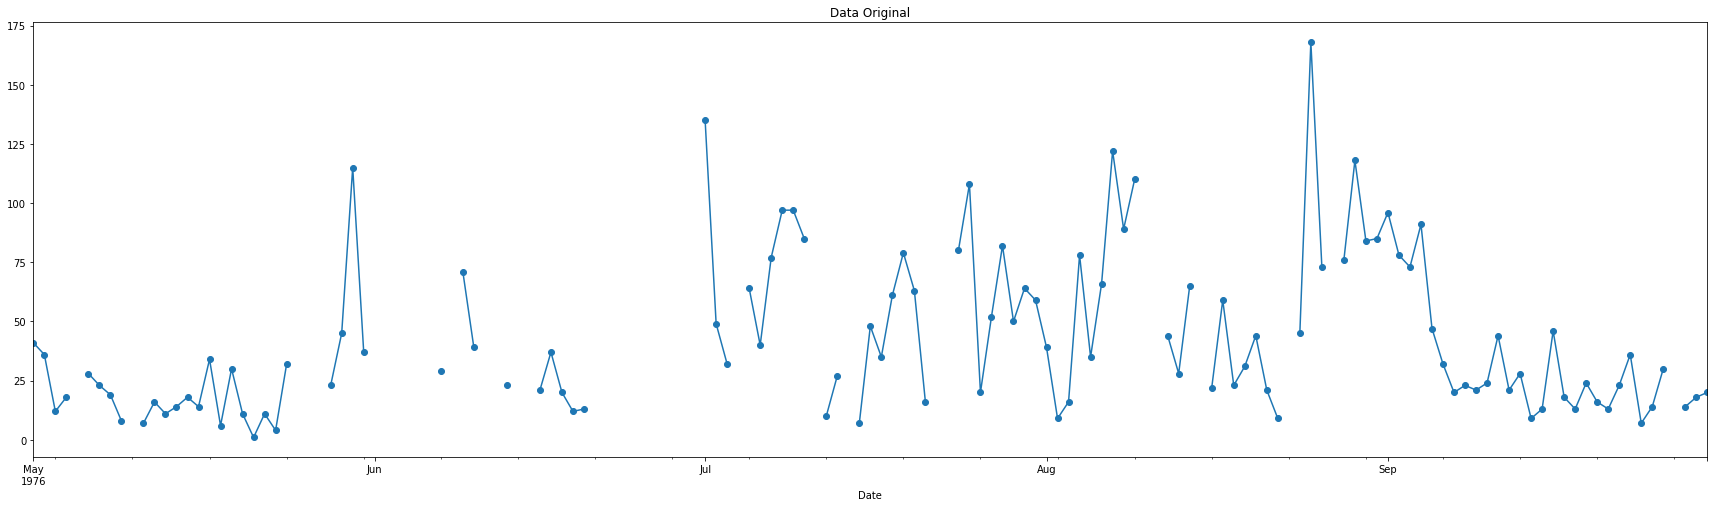

In [194]:
df['Ozone'].plot(title= 'Data Original', marker='o', figsize=(30, 8))
plt.show()

A continuación se generaliza la gráfica para todos los métodos de imputación. Utilizaremos la columna _Ozone_ para visualizar los resultados de la imputación.

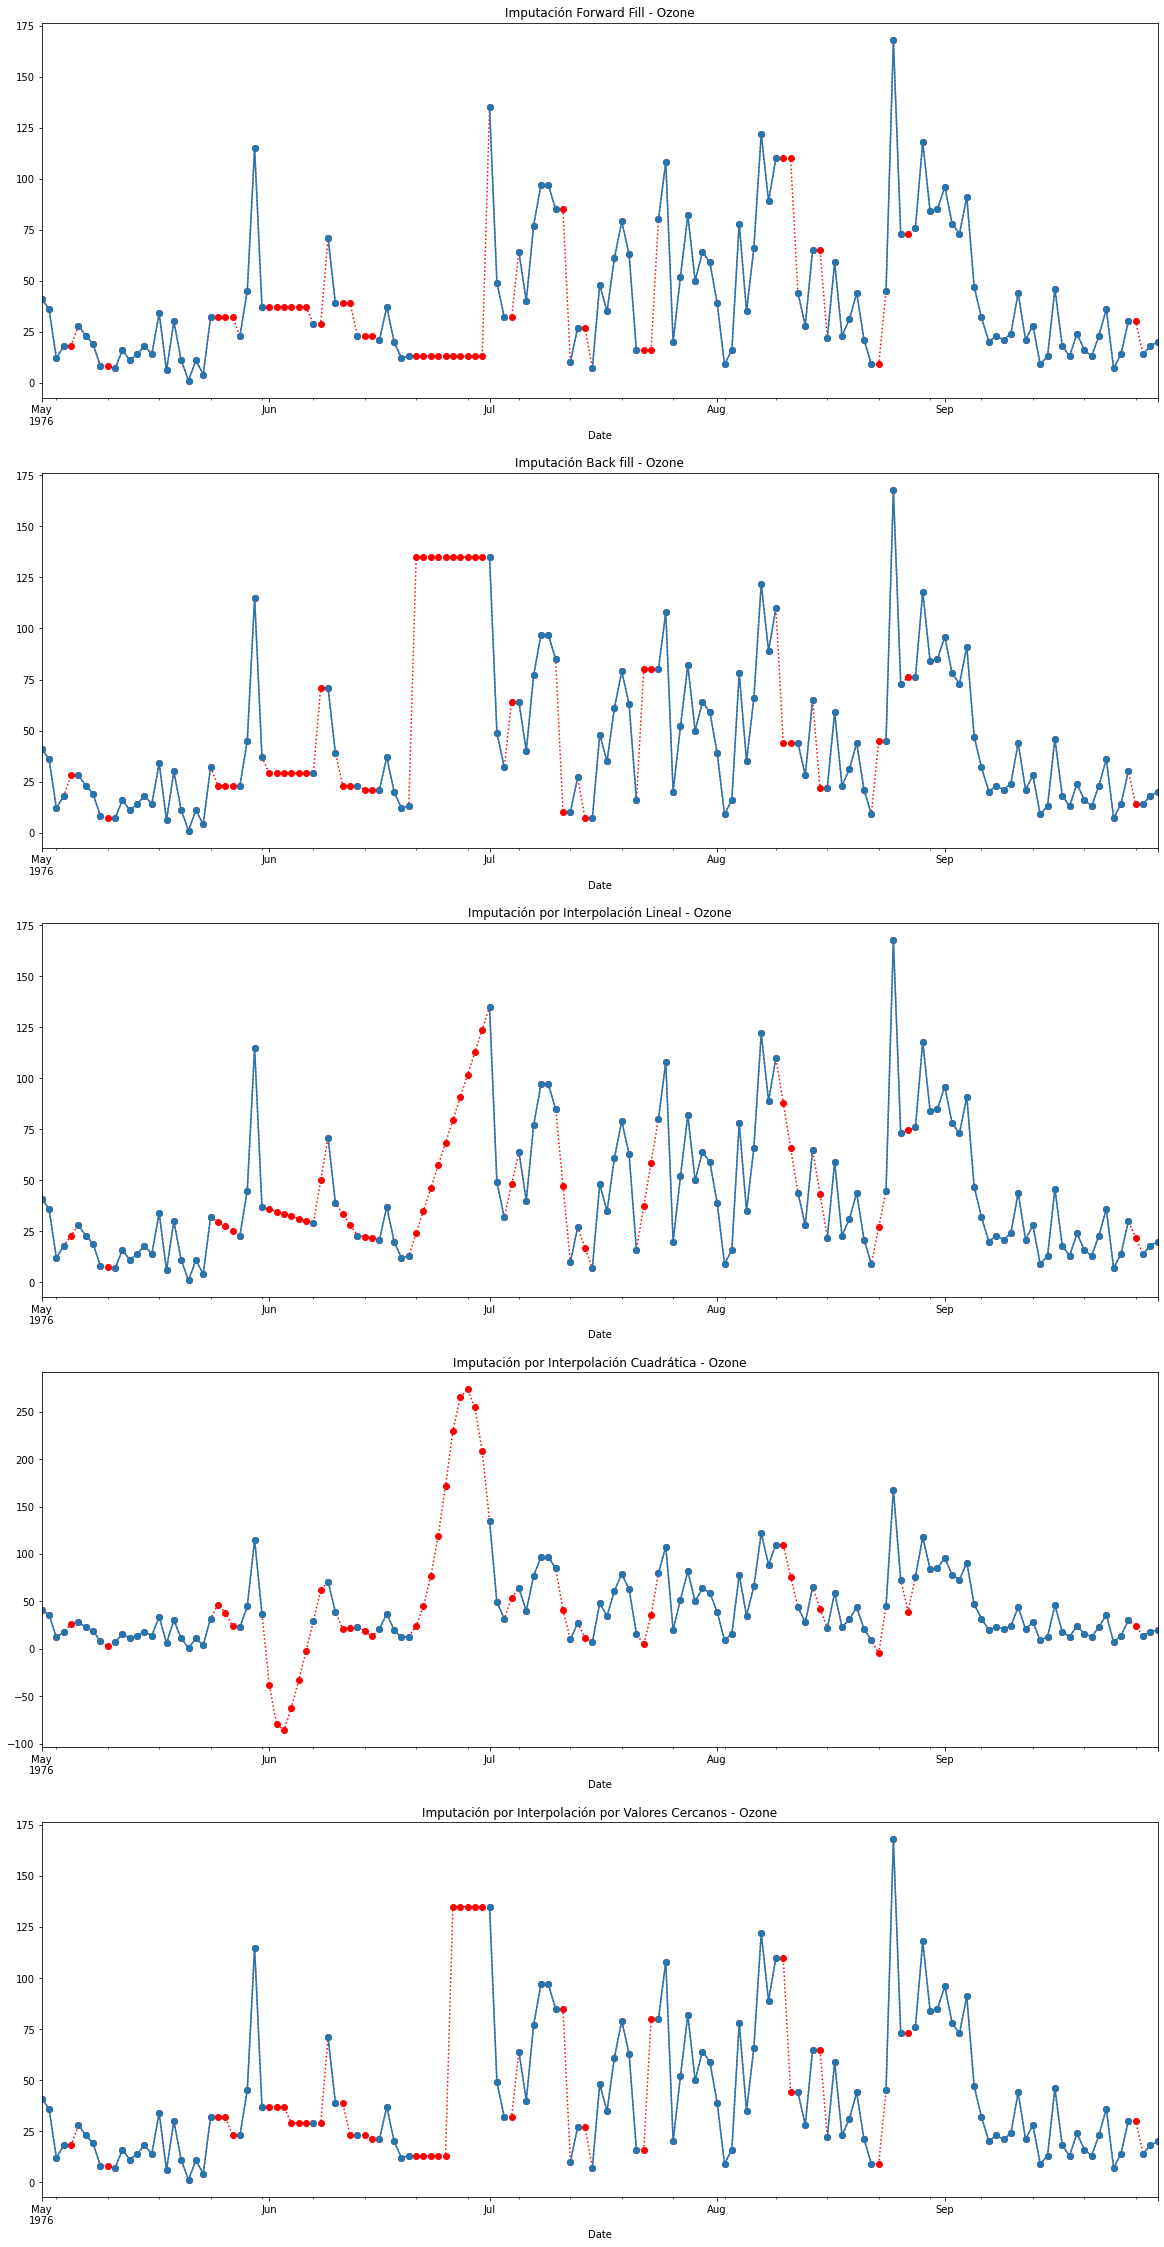

In [196]:
# Crear diccionarios métodos de imputación
metodos = {'Imputación Forward Fill':'ffill',
          'Imputación Back fill': 'bfill',}

metodos2 = {'Imputación por Interpolación Lineal': 'linear', 
           'Imputación por Interpolación Cuadrática': 'quadratic', 
           'Imputación por Interpolación por Valores Cercanos': 'nearest'}

# Crear diccionario resultado de imputación
interpolaciones = {key:df.fillna(method=value) for key, value in metodos.items()}

# Actualizar diccionario resultado de imputación (interpolación)
interpolaciones.update({key:df.interpolate(method=value) for key, value in metodos2.items()})

# Configurar número de filas a 5 y número de columnas a 1
fig, axes = plt.subplots(5, 1, figsize=(20, 40))

# Loop for sobre axes e interpolaciones
for ax, key in zip(axes, interpolaciones):
  # Generar gráfica de data imputada
  interpolaciones[key]['Ozone'].plot(color='red', marker='o', linestyle='dotted', ax=ax)
  # Generar gráfica de data original
  df['Ozone'].plot(title=key + ' - Ozone', marker='o', ax=ax)
  
plt.show()

### Métodos avanzados de imputación

- Imputación de datos por medio de KNN (K-Vecinos Cercanos). Biblioteca KKNImputer().

En el caso de los K-Vecinos más cercanos por ejemplo, el objetivo fundamental es encontrar vecinos cercanos al valor faltante por por medio de métricas de distancias. La más utilizada es la euclidiana.

Este método es más preciso que los métoodos imputación simples tales como media, mediana, moda o valor constante. Sin embargo, estos modelos pueden ser costosos computacionalmente hablando, pueden generar multicolinealidad y son sensibles a valores atípicos.

A continuación, realizaremos un ejemplo usando lel módulo `KNNImputer()` de la bibliteca sklearn.impute,

In [557]:
import numpy as np
import pandas as pd

# Dataframe
data = pd.DataFrame({'ranking': [1, 2, 1, 3, 1, 2, 3, 2, 3],
                     'area': [1, 2, 3, 1, 2, 3, 1, 2, 3],
                     'edad': [32, 30, np.nan, 23, 27, 44, 67, 23, np.nan],
                     'monto': [102, 121, 343, np.nan, 121, np.nan, 155, 149, 221]})

In [559]:
# Importar módulo KNNImputer
from sklearn.impute import KNNImputer

# Generar copia del DataFrame diabetes
data_imputer = data.copy(deep = True)

# Iniciar KNNImputer con 2 vecino cercano
imputacion_knn = KNNImputer(n_neighbors=1)

# Imputar usando fit_tranform en data_imputer
data_imputer.iloc[:, :] = imputacion_knn.fit_transform(data_imputer)

data_imputer


,ranking,area,edad,monto
0,1.0,1.0,32.0,102.0
1,2.0,2.0,30.0,121.0
2,1.0,3.0,44.0,343.0
3,3.0,1.0,23.0,149.0
4,1.0,2.0,27.0,121.0
5,2.0,3.0,44.0,343.0
6,3.0,1.0,67.0,155.0
7,2.0,2.0,23.0,149.0
8,3.0,3.0,44.0,221.0


Observamos que los valores ausentes de la variable *edad* han tomado los valores 44 en la fila 3 y 44 en la fila 9. En tanto, para la variable *monto* ha tomado el valor 149.0 en la fila 4 y 343.0 en la fila 6
A continuación realizaremos el calculo manual de este tipo de imputación a fin de ver si  el algoritmo realiza de manera correcta la imputación.

In [560]:
data

,ranking,area,edad,monto
0,1,1,32.0,102.0
1,2,2,30.0,121.0
2,1,3,NaN,343.0
3,3,1,23.0,NaN
4,1,2,27.0,121.0
5,2,3,44.0,NaN
6,3,1,67.0,155.0
7,2,2,23.0,149.0
8,3,3,NaN,221.0


La formula de calculo es la siguiente.

$\text{Distancia Euclidiana nan = } \sqrt{peso * ((x_2 - x_1)^2)+(y_2 - y_1)^2)+ ...+ (z_2 -z_1)^2} $

$\text{donde peso} = \dfrac{\text{num columnas predictoras}}{\text{num columnas predictoras}- \text{columnas nan}}$


nota: las columnas predictoras son aquellas que buscan predecir el valor nulo. 

El siguiente ejemplo busca predecir el valor faltante tanto de la fila 3 y 9 de la columna edad. En este caso:



|ranking  |area	|edad |monto|
|-----|-----|-----|-----|
|1    |3	|NaN  |343.0|
|3    |3	|NaN  |221.0|



- columnas predictoras= 3, es decir: _ranking_, _area_, _monto_.
- columnas predictoras- columnas nan = número de columnas válidas de la fila que se usa para predecir. En el caso de las fila 4 son 2, , es decir: _id_, _area_. _Monto_ es NaN.


Para la fila 3, el valor a imputar es 44 dado que tiene la menor distancia.

A continuación, se genera una función ad-hoc a los al dataset que tenemos a fin de obtener las distancias euclideanas para las filas 3 y 9 para así predecir el valor de la columna _age_

In [561]:
# sqrt(peso * ((x2 - x1)^2 + (y2 - y1)^2 + (z2 - z1)^2 )
import math
def fn_knn_manual(x1,y1,z1):
    valor = pd.DataFrame({'numero': [data.iloc[0,2], data.iloc[1,2], data.iloc[3,2],data.iloc[4,2], data.iloc[5,2], data.iloc[6,2], data.iloc[7,2]],
              'distancia':[math.sqrt(3/3 * (( int(data.iloc[0,0]) - x1 )**2 + ( int(data.iloc[0,1]) - y1 )**2 + (int(data.iloc[0,3]) - z1 )**2)),
                           math.sqrt(3/3 * (( int(data.iloc[1,0]) - x1 )**2 + ( int(data.iloc[1,1]) - y1 )**2 + (int(data.iloc[1,3]) - z1 )**2)),
                           math.sqrt(3/2 * (( int(data.iloc[3,0]) - x1 )**2 + ( int(data.iloc[3,1]) - y1 )**2)),
                           math.sqrt(3/3 * (( int(data.iloc[4,0]) - x1 )**2 + ( int(data.iloc[4,1]) - y1 )**2 + (int(data.iloc[4,3]) - z1 )**2)),
                           math.sqrt(3/2 * (( int(data.iloc[5,0]) - x1 )**2 + ( int(data.iloc[5,1]) - y1 )**2)),
                           math.sqrt(3/3 * (( int(data.iloc[6,0]) - x1 )**2 + ( int(data.iloc[6,1]) - y1 )**2 + (int(data.iloc[6,3]) - z1 )**2)),
                           math.sqrt(3/3 * (( int(data.iloc[7,0]) - x1 )**2 + ( int(data.iloc[7,1]) - y1 )**2 + (int(data.iloc[7,3]) - z1 )**2))]})
    return(valor)

A continuación calcularemos el valor a imputar con 1 vecino cercano para la fila 3 de nuestro dataset

In [578]:
# Encontrar valor ausente para fila 3
distancias_f3 = fn_knn_manual(x1 = 1, y1 = 3, z1 = 343.0)
#distancias = distancias.sort_values('distincia').reset_index(drop=True)
distancias_f3 = distancias_f3.sort_values('distancia').reset_index(drop=True)
distancias_f3

,numero,distancia
0,44.0,1.224745
1,23.0,3.464102
2,67.0,188.021275
3,23.0,194.005155
4,27.0,222.002252
5,30.0,222.004504
6,32.0,241.008299


Observamos que el valor a imputar es de 44 años dado que presenta la menor distancia.

A continuación, realizaremos el cálculo para imputar la data faltante con hasta 5 vecinos cercanos y comprobaremos los resultados.

In [592]:
# n_neighbors cantidad de vecinos. Si se escoge un valor mayor de uno se obtiene el promedio delos vecinos cercanos detectados.
for i in range(1,6):

    # Generar copia del DataFrame diabetes
    data_imputer = data.copy(deep = True)

    # Cantidad de vecinos
    knn = KNNImputer(n_neighbors=i)

    # Generar copia del DataFrame diabetes
    data_imputer = data.copy(deep = True)

    # se aplica la imputación por knn entrenada a la data.
    data_imputer.iloc[:, :]  = knn.fit_transform(data_imputer)


    # Modificamos el nombre de las columnas por el nombre original 
    #neighbors.columns = columnas
    print('neighbors = ' + str(i))
    print(data_imputer)
    print('_'*45) # imprimir linea divisora de df
    print() #imprimir salto de línea

data_imputer

neighbors = 1
   ranking  area  edad  monto
0      1.0   1.0  32.0  102.0
1      2.0   2.0  30.0  121.0
2      1.0   3.0  44.0  343.0
3      3.0   1.0  23.0  149.0
4      1.0   2.0  27.0  121.0
5      2.0   3.0  44.0  343.0
6      3.0   1.0  67.0  155.0
7      2.0   2.0  23.0  149.0
8      3.0   3.0  44.0  221.0
_____________________________________________

neighbors = 2
   ranking  area  edad  monto
0      1.0   1.0  32.0  102.0
1      2.0   2.0  30.0  121.0
2      1.0   3.0  33.5  343.0
3      3.0   1.0  23.0  185.0
4      1.0   2.0  27.0  121.0
5      2.0   3.0  44.0  282.0
6      3.0   1.0  67.0  155.0
7      2.0   2.0  23.0  149.0
8      3.0   3.0  33.5  221.0
_____________________________________________

neighbors = 3
   ranking  area       edad       monto
0      1.0   1.0  32.000000  102.000000
1      2.0   2.0  30.000000  121.000000
2      1.0   3.0  44.666667  343.000000
3      3.0   1.0  23.000000  237.666667
4      1.0   2.0  27.000000  121.000000
5      2.0   3.0  44.000

,ranking,area,edad,monto
0,1.0,1.0,32.0,102.0
1,2.0,2.0,30.0,121.0
2,1.0,3.0,36.8,343.0
3,3.0,1.0,23.0,191.0
4,1.0,2.0,27.0,121.0
5,2.0,3.0,44.0,181.6
6,3.0,1.0,67.0,155.0
7,2.0,2.0,23.0,149.0
8,3.0,3.0,37.4,221.0


Ahora bien, realizaremos una función que nos ayudará a calcular el valor a imputar para el dato ausente de la variable edad para distintas cantidades de vecinos cercanos. Luego calcularenos el valor usando el método manual.

In [584]:
def fn_imputar_cant_vecinos(n_neighbors, df):
    # Cantidad de vecinos cercarnos
    cantidad = n_neighbors
    # Valor inicial para calcular el valor a imputar
    total_sum = 0
    for i in range(cantidad):
        total_sum += df.loc[i, 'numero']
        valor_a_imputar = total_sum / (i+1)
        print(f'* Cantidad de vecinos cercanos = {i+1}, el valor a imputar es {valor_a_imputar}')


In [585]:
# Fila 3
fn_imputar_cant_vecinos(5, distancias_f3)

* Cantidad de vecinos cercanos = 1, el valor a imputar es 44.0
* Cantidad de vecinos cercanos = 2, el valor a imputar es 33.5
* Cantidad de vecinos cercanos = 3, el valor a imputar es 44.666666666666664
* Cantidad de vecinos cercanos = 4, el valor a imputar es 39.25
* Cantidad de vecinos cercanos = 5, el valor a imputar es 36.8


Ahora comprobaremos los valores de imputación para la fila 8

In [586]:
# Encontrar valor ausente para fila 8
distancias_f8 = fn_knn_manual(x1=3 , y1 =3 , z1 = 221.0)
#distancias = distancias.sort_values('distincia').reset_index(drop=True)
distancias_f8 = distancias_f8.sort_values('distancia').reset_index(drop=True)
distancias_f8

,numero,distancia
0,44.0,1.224745
1,23.0,2.449490
2,67.0,66.030296
3,23.0,72.013888
4,30.0,100.010000
5,27.0,100.024997
6,32.0,119.033609


Vemos que el valor a imputar es el mismo que nos muestra la función KNNImputer().

También, aplicaremos la función para calcular el valor a imputar con distinta cantidad de vecinos cercanos.

In [587]:
# Fila 8
fn_imputar_cant_vecinos(5, distancias_f8)

* Cantidad de vecinos cercanos = 1, el valor a imputar es 44.0
* Cantidad de vecinos cercanos = 2, el valor a imputar es 33.5
* Cantidad de vecinos cercanos = 3, el valor a imputar es 44.666666666666664
* Cantidad de vecinos cercanos = 4, el valor a imputar es 39.25
* Cantidad de vecinos cercanos = 5, el valor a imputar es 37.4


Hemos verificado que los valores a imputar de la variable edad son los mismo tanto usando la función KNNImputer() y el método manual.

- Imputación de datos por medio de KNN (K-Vecinos Cercanos). Biblioteca fancyimpute()

A diferencia del paquete anterior, funcyimpute asume que cada característica ha sido centrada y reescalada para tener media cero y varianza 1. Dado esto, puede presentar diferencias con el paquete anterior para k-Neighbor > 1.

In [604]:
# Importar KNN desde fancyimpute
from fancyimpute import KNN

# Generar copia de dataset
data_imputer = data.copy(deep = True)

# Inicializar KNN
imputacion_knn = KNN(k=5)

# Imputar usando fit_tranform 
data_imputer.iloc[:, :] = imputacion_knn.fit_transform(data_imputer)

data_imputer

Imputing row 1/9 with 0 missing, elapsed time: 0.006


,ranking,area,edad,monto
0,1.0,1.0,32.000000,102.000000
1,2.0,2.0,30.000000,121.000000
2,1.0,3.0,41.666567,343.000000
3,3.0,1.0,23.000000,181.162812
4,1.0,2.0,27.000000,121.000000
5,2.0,3.0,44.000000,280.087899
6,3.0,1.0,67.000000,155.000000
7,2.0,2.0,23.000000,149.000000
8,3.0,3.0,39.802423,221.000000


Ahora realizaremos imputación a la data diabetes usando fancyimputer

In [605]:
# Importar KNN desde fancyimpute
from fancyimpute import KNN

# Generar copia de dataset diabetes
diabetes_imputacion_knn = diabetes.copy(deep = True)

# Inicializar KNN
imputacion_knn = KNN(k=5)

# Imputar usando fit_tranform en dataset diabetes_knn_imputed
diabetes_imputacion_knn.iloc[:, :] = imputacion_knn.fit_transform(diabetes_imputacion_knn)

# Imprimir resultado
diabetes_imputacion_knn

Imputing row 1/752 with 1 missing, elapsed time: 0.073
Imputing row 101/752 with 0 missing, elapsed time: 0.075
Imputing row 201/752 with 2 missing, elapsed time: 0.077
Imputing row 301/752 with 0 missing, elapsed time: 0.078
Imputing row 401/752 with 1 missing, elapsed time: 0.080
Imputing row 501/752 with 2 missing, elapsed time: 0.081
Imputing row 601/752 with 0 missing, elapsed time: 0.083
Imputing row 701/752 with 0 missing, elapsed time: 0.084


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,162.743255,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,62.914770,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,26.464588,180.726394,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,169.595752,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,32.886413,130.228539,30.1,0.349,47.0,1.0


- Imputaciones de Valores para datos 
categóricos: 

Hemos imputado valores para variables numéricas, pero ¿cómo actuamos en presencia de variables categóricas?. Esta biblioteca nos ofrece la forma de cómo debemos imputar la data

Este algoritmo en primer lugar, transforma las varaibles categóricas a variables numéricas. Para esto, exiten dos técnicas para transformar los datos: One-Hot Encoder y Ordinal Encoder

**One-Hot Encoder**: 

Crear una columna para cada valor distinto que exista en la variable que estamos codificando y coloca el valor 1 a la columna que pertenece el registro y las demás se coloca el vaor 0.

|Pais|Pais_Chile|Pais_Argentina|Pais_Perú|Pais_Bolivia|
|--|--|--|--|--|
|Chile|1|0|0|0|
|Argentina|0|1|0|0|
|Perú|0|0|1|0|
|Bolivia|0|0|0|1|

**Ordinal Encoder**

Se crea una columna que va tomando distintos valores por categoría de la variable que estamos codificando. 
    
|Pais|Vaue|
|--|--|
|Chile|0|
|Argentina|1|
|Perú|2|
|Bolivia|3|

A continuación, revializaremos un ejemplo usando un dataset descargado desde el sitio https://archive.ics.uci.edu/ml/datasets/Restaurant%2B%26%2Bconsumer%2Bdata. Además, se han seleccionado algunas columnas para el ejercicio.

In [607]:
# Importar data
users = pd.read_csv(ruta + 'userprofile.csv', sep = ';', na_values= '?')
users.head(10)

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,False,abstemious,informal,family,independent,student,medium
1,False,abstemious,informal,family,independent,student,low
2,False,social drinker,formal,family,independent,student,low
3,False,abstemious,informal,family,independent,professional,medium
4,False,abstemious,no preference,family,independent,student,medium
5,True,social drinker,no preference,friends,independent,student,medium
6,False,casual drinker,informal,solitary,independent,student,low
7,False,social drinker,formal,solitary,independent,student,low
8,False,abstemious,formal,family,kids,student,medium
9,False,social drinker,no preference,friends,kids,student,medium


In [609]:
# Determinar nulos
users.isna().sum()

smoker               3
drink_level          0
dress_preference     5
ambience             6
hijos               11
activity             7
budget               7
dtype: int64

In [627]:
# Visualizar encoder
users.head(7)

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,False,abstemious,informal,0.0,independent,student,medium
1,False,abstemious,informal,0.0,independent,student,low
2,False,social drinker,formal,0.0,independent,student,low
3,False,abstemious,informal,0.0,independent,professional,medium
4,False,abstemious,no preference,0.0,independent,student,medium
5,True,social drinker,no preference,1.0,independent,student,medium
6,False,casual drinker,informal,2.0,independent,student,low


Realizar función que captura valores únicos a fin de revisar si los valores nulos han sido ingresados en un formato incorrecto.

In [618]:
# Iterar valores por columnas
for columna in users.columns:
    # Ordenar valores y seleccionar valores únicos
    i = users[columna].sort_values().unique()
    # Imprimir nombre de columnas y lista de sus valores únicos
    print(columna, i, '\n')

smoker [False True nan] 

drink_level ['abstemious' 'casual drinker' 'social drinker'] 

dress_preference ['elegant' 'formal' 'informal' 'no preference' nan] 

ambience ['family' 'friends' 'solitary' nan] 

hijos ['dependent' 'independent' 'kids' nan] 

activity ['professional' 'student' 'unemployed' 'working-class' nan] 

budget ['high' 'low' 'medium' nan] 



Ahora procederemos a pasar los valores categóricos a numéricos. Usaremos la técnica OrdinalEncoder.

In [625]:
#Importar librería
from sklearn.preprocessing import OrdinalEncoder

# Crear Objeto Encoder Nominal
ambience_ord_enc = OrdinalEncoder()

# Seleccionar los valores no nulos de la columna ambiece del DataFrame users.
ambience = users['ambience']
ambience_not_null = ambience[ambience.notnull()]

# Cambiar forma  a data ambience_not_null a forma (-1, 1)
reshaped_vals = ambience_not_null.values.reshape(-1, 1)

# Aplicar Ordinal Encode a reshaped_vals
encoded_vals = ambience_ord_enc.fit_transform(reshaped_vals)

# Asignar valores codificados a valores no nulos de la variable ambience en el DataFrame users
users.loc[ambience.notnull(), 'ambience'] = np.squeeze(encoded_vals)

A continuación se procede a generalizar lo realizado anteriormente por medio de un loop for

In [628]:
# Crear diccionario vacio "ordinal_enc_dict"
ordinal_enc_dict = {}

for col_name in users:
    # Crear Ordinal encoder para col
    ordinal_enc_dict[col_name] = OrdinalEncoder()
    col = users[col_name]
    
    # Seleccionar valores non-null de col
    col_not_null = col[col.notnull()]
    reshaped_vals = col_not_null.values.reshape(-1, 1)
    encoded_vals = ordinal_enc_dict[col_name].fit_transform(reshaped_vals)
    
    # Almacenar los valores a los valores de la columna de DataFrame users
    users.loc[col.notnull(), col_name] = np.squeeze(encoded_vals)

In [629]:
# Primeros registros data Encoder
users.head(7)

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,0.0,0.0,2.0,0.0,1.0,1.0,2.0
1,0.0,0.0,2.0,0.0,1.0,1.0,1.0
2,0.0,2.0,1.0,0.0,1.0,1.0,1.0
3,0.0,0.0,2.0,0.0,1.0,0.0,2.0
4,0.0,0.0,3.0,0.0,1.0,1.0,2.0
5,1.0,2.0,3.0,1.0,1.0,1.0,2.0
6,0.0,1.0,2.0,2.0,1.0,1.0,1.0


Una vez codificada la data, se procede a realizar la imputación por medio de `KNN()`

In [630]:
# Crear imputador KNN
KNN_imputer = KNN()

# Imputar y redondear los valores en el DataFrame users
users.iloc[:, :] = np.round(KNN_imputer.fit_transform(users))

# Aplicar loop for a las columnas del DataFrame users
for col_name in users:
    
    # Transformar la data
    reshaped = users[col_name].values.reshape(-1, 1)
    
    # Realizar transformación inversa de las columnas codificadas ordinalmente
    users[col_name] = ordinal_enc_dict[col_name].inverse_transform(reshaped)

Imputing row 1/138 with 0 missing, elapsed time: 0.007
Imputing row 101/138 with 0 missing, elapsed time: 0.010


In [631]:
# Revisar presencia de datos faltantes.
users.isna().sum()

smoker              0
drink_level         0
dress_preference    0
ambience            0
hijos               0
activity            0
budget              0
dtype: int64

In [633]:
# Visualizar data imputada
users.head(5)

,smoker,drink_level,dress_preference,ambience,hijos,activity,budget
0,False,abstemious,informal,0.0,independent,student,medium
1,False,abstemious,informal,0.0,independent,student,low
2,False,social drinker,formal,0.0,independent,student,low
3,False,abstemious,informal,0.0,independent,professional,medium
4,False,abstemious,no preference,0.0,independent,student,medium


- Imputaciones múltiples por ecuaciones encadenadas (MICE)

Método robusto para imputación de data faltante. Este algoritmo utiliza regresiones múltiples sobre los datos y toma un valor promedio para completar el valor faltante para el conjunto de datos.

A continuación imputaremos los valores faltantes del dataset diabetes.

In [594]:
# Import IterativeImputer from fancyimpute
from fancyimpute import IterativeImputer

# Copy diabetes to diabetes_mice_imputed
diabetes_mice_imputed = diabetes.copy(deep= True)

# Initialize IterativeImputer
mice_imputer = IterativeImputer()

# Impute using fit_tranform on diabetes
diabetes_mice_imputed.iloc[:, :] = mice_imputer.fit_transform(diabetes_mice_imputed)
diabetes_mice_imputed

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.000000,218.666626,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.000000,70.738265,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,21.532888,268.732425,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
763,10.0,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.000000,159.038930,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0.0
766,1.0,126.0,60.0,27.896077,173.401535,30.1,0.349,47.0,1.0
